# Project 7: Machine Learning 

## Author : Aanchal Gupta

## Github Respositary: https://github.com/aanchalgt/datafun-07-ml

In [5]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np


## Part 1- Chart a straight line

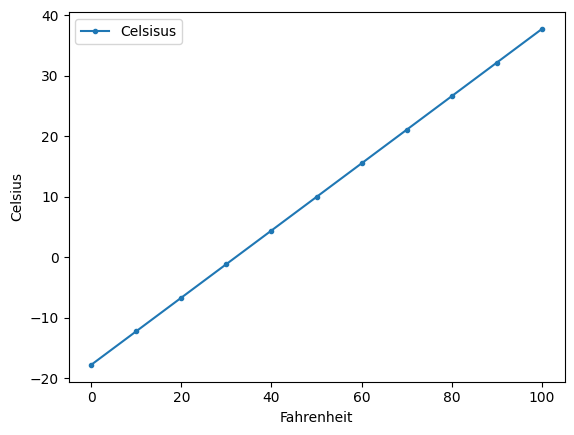

In [6]:
#convert Fahrenheit to Celsius 
c = lambda f: 5 / 9 * (f - 32)

# Store each Fahrenheit/Celsius pair as a tuple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsisus'])

#label the axis
axes = temps_df.plot(x='Fahrenheit', y='Celsisus', style = '.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 -  Prediction


### Section 1- Data Acquisition


In [7]:
# loading NY city January high temprature from csv file into dataframe

nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2- Data Inspection

In [8]:
# Inspect first 5 rows (head)
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
# Inspect last 5 rows (tail)
nyc_df.tail()


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3- Data Cleaning

In [13]:
#Change column names 
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Truncate to remove last 2 digits
nyc_df.Date = nyc_df.Date.floordiv(100)

# Inspect the change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [15]:
# Check data type of date column
nyc_df.Date.dtype


dtype('int64')

### Section 4 - Descriptive Statistics

In [16]:
# Setting precision to show decimal points .00
pd.set_option('display.precision', 2)

# Calculate basic descriptive statistics for the dataset
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [18]:
# Create linear regression function
linear_regression = stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)

# line's slope
print(f" Slope:{linear_regression.slope}")

# line's intercept
print(f"Intercept: {linear_regression.intercept}")

 Slope:0.014771361132966163
Intercept: 8.694993233674289


### Section 6 - Predict

In [20]:
print(f"Avg high temp in Jan 2024: {linear_regression.slope * 2024 + linear_regression.intercept} Degrees F")

Avg high temp in Jan 2024: 38.5922281667978 Degrees F


### Section 7 - Visualizations

(10.0, 60.0)

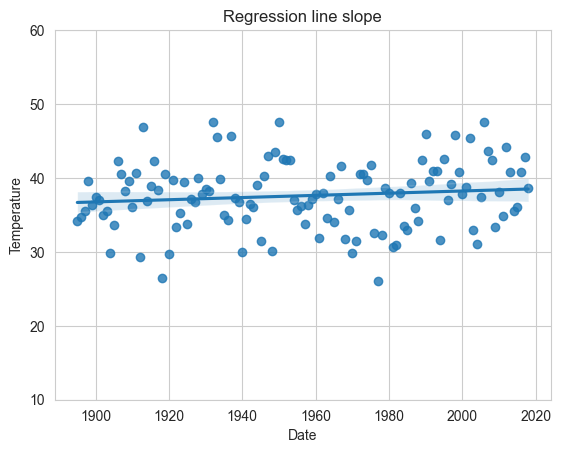

In [23]:
# Create scatter plot
sns.set_style('whitegrid')

# set axes
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

#set title
axes.set_title('Regression line slope')
               
# Y axis limits
axes.set_ylim(10,60)